# Experiment Name

In [1]:
from pathlib import Path

# import fiberphotopy
import fiberphotopy as fp

%matplotlib inline
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'fiberphotopy'

Note: The following can be ran as is assuming your project has the following structure:

```
project_name/
├── data/
├── figures/
└── notebooks/
```

If you want to utilize an `expt_config.yml` file you can run:
`fp.create_expt_config(expt_name, config_name, project_path)`

- `expt_name`: Name of the experiment (placed in top line of expt_config file).
- `config_name`: used to name the file. If left blank config file is named `expt_config.yml`, otherwise it will be named `expt_config-{config_name}.yml`
- `project_path`: where to place the expt_config.yml file. If no path is provided it will use Path.cwd()

In [2]:
project_path = Path.cwd().parents[0]
# # Optional: load config file info
# config_file = list(project_path.glob("*tfc.yml"))[0]
# expt_config = fp.load_expt_config(config_file)
# figure_path = expt_config["dirs"]["figures"]
# proc_data_path = f"{expt_config['dirs']['data']}processed"

In [3]:
# load raw data
# can also list path to data explicitly
fp_data_path = project_path / "docs" / "datasets"

# create dict for renaming, in practice there will often be more than one recording to analyze
subject_dict = {
    "session_1": "mouse1",
}

# load all data files in directory
# TTL_trim = True by default. This uses trim_ttl_data to extract just the session
# downsample = True by default. Downsamples data to the give freq (by default 10)
# optional: save the semi-processed data. If no data_path is provided it will be saved to Path.cwd()
df = fp.load_session_data(
    fp_data_path,
    subject_dict=subject_dict,
    #
    save=False,
    data_path=None,
    filename="tfc_camk2_gcamp_train_session",
)

## Plot data from a behavior session

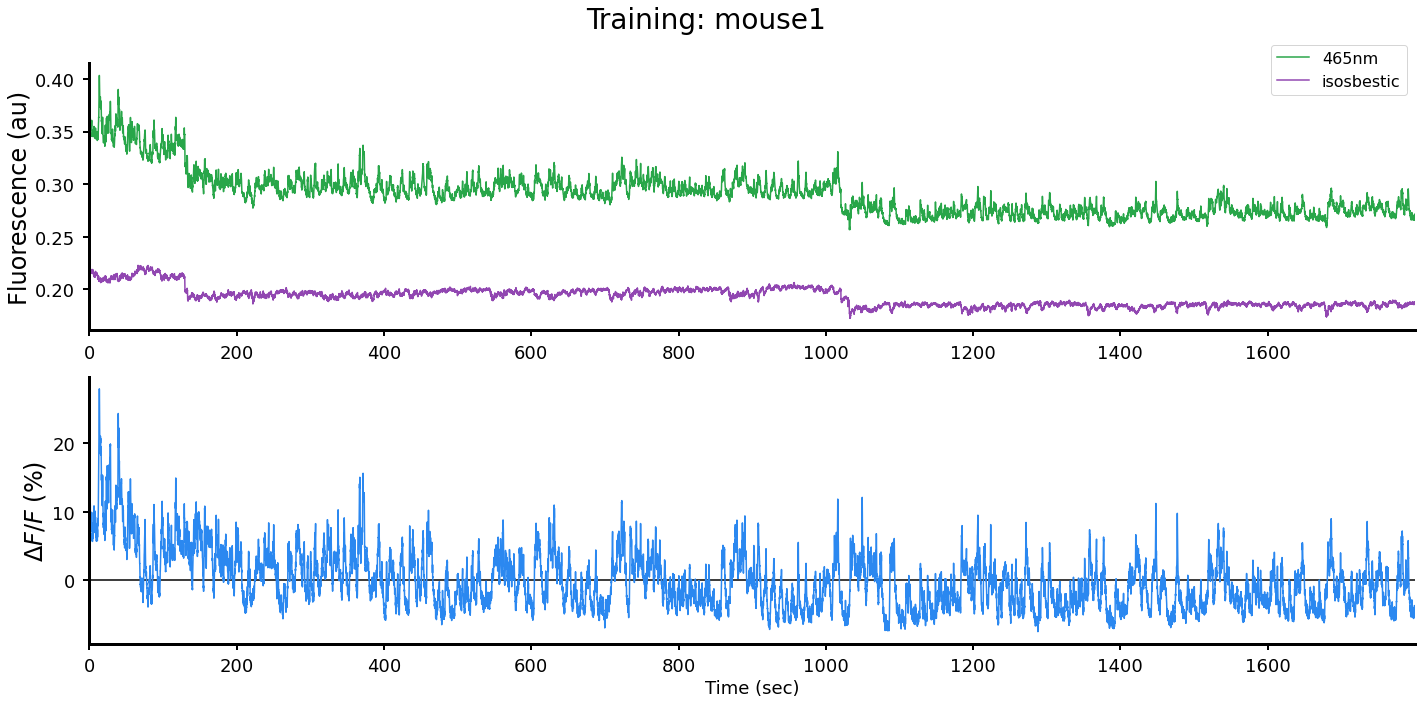

In [4]:
fp.plot_fp_session(df, save_fig=False, fig_path=None)

## Plot trial-averaged data

Trial-level data can be obtained from `fp.tfc_trials_df(...)`:

In [5]:
# get trial-level data
df_trials = fp.tfc_trials_df(df)

To plot a trial-average, use `fp.plot_trial_avg(...)`. The function provides several arguments to modify the plot in many ways.
For example, a `hue` argument can provided to plot each animal's trial-average, or two visualize two different treatment groups.

**Note:** The hue argument below is only specified below because `df_trials` contains one subject and will not plot the error of the trial-averages in this scenario.

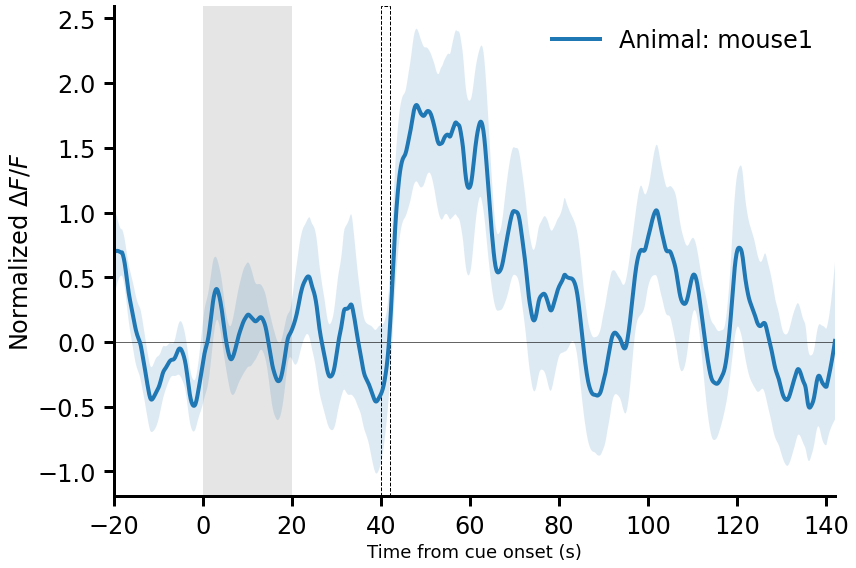

In [6]:
fp.plot_trial_avg(df_trials, hue='Animal')